# 9. Mësimi i makinerisë pa mbikëqyrje - Grumbullimi

(nga Gorjan Nadzinski, FEEIT, CMUS, Macedonia)

Në këtë kapitull do të mësoni për mësimin e pambikëqyrur të makinerisë, si një metodë e të mësuarit nga të dhënat që janë 'të paetiketuara', domethënë ka vetëm veçori të njohura, por jo vlera ose klasë të njohura (shih fig.1). Ideja e përgjithshme është se algoritmi do të jetë në gjendje të klasifikojë të dhënat duke nxjerrë përfundime nga disa modele të fshehura.

<figure>
<img src="unsup1.png" style="height: 300px;"/> 
<figcaption align = "center"> Figura 1 </figcaption>
</figure>

Grumbullimi është një formë e mësimit të pambikëqyrur ku një algoritëm ka për detyrë të grupojë një grup objektesh në grupe të quajtura **grumbullime** në mënyrë që objektet në të njëjtin grumbullim të jenë më të ngjashëm me njëri-tjetrin sesa me ato në grumbullime të tjera.

Ekzistojnë disa algoritme të ndryshme grupimi, si p.sh.:

* KMeans;
* DBSCAN;
* Grumbullimi hierarkik aglomerativ;
* Grumbullimi i pritje-maksimizim (EM);
* Grumbullimi i zhvendosjes mesatare. 

Shumë shpesh i takon përdoruesit të tregojë numrin e grupimeve, pra ky është hiperparametri më i rëndësishëm në grupim. Më pas, algoritme të ndryshme përdorin metoda të ndryshme për të grupuar të dhënat në grupe (p.sh. distanca midis pikave të të dhënave, dendësia e pikave të të dhënave, etj.).

## 9.1. Grumbullimi KMeans

### 9.1.1. Algoritmi

Kjo është një nga metodat më të njohura dhe më të përdorura për grupim. Ai i ndan të dhënat në K grupime të ndryshme bazuar në distancën Euklidiane (gjeometrike) ndërmjet pikave të të dhënave. 

Është një algoritëm i thjeshtë që funksionon si më poshtë:
1. Gjeneroni pikat qendrore (të quajtura **centroide**) të grupeve K në mënyrë rastësore.
2. Kaloni nëpër të gjitha pikat e të dhënave dhe kontrolloni se cila qendër është më afër; caktoni pikën e të dhënave në atë grup.
3. Llogaritni një vendndodhje të re për secilën nga K centroidet duke llogaritur mesataren e vendndodhjeve të të gjitha pikave të të dhënave të caktuara në atë grup.
4. Llogaritni vlerën e **funksionit të kostos** për grupimin e dhënë.
5. Nëse diferenca midis vlerave të funksionit të kostos në përsëritjen aktuale dhe të mëparshme është më e madhe se një tolerancë $\epsilon$, atëherë kthehuni në hapin 2. Përndryshe, ktheni grupimin e fundit.
OSE
Nëse numri maksimal i përsëritjeve nuk është arritur, atëherë kthehuni në hapin 2. Përndryshe, ktheni grupimin e fundit.

Hapi i fundit ndryshon në varësi të faktit nëse kushti për të ndaluar algoritmin është arritja e një numri të përsëritjeve maksimale, ose nëse kushti është që vlera e funksionit të kostos të konvergojë (d.m.th. ndalon ndryshimin e ndjeshëm midis përsëritjeve). Pragu $\epsilon$ nën të cilin ndryshimi konsiderohet i parëndësishëm është gjithashtu një hiperparametër i përcaktuar nga përdoruesi.

Algoritmi është paraqitur vizualisht në fig.2., ku është paraqitur rishpërndarja e pikave të të dhënave në 3 grupe mbi 14 përsëritje. 

<figure>
<img src="K-means_convergence.gif" style="height: 300px;"/>
<figcaption align = "center"> Figura 2 (Chire, CC BY-SA 4.0 <https://creativecommons.org/licenses/by-sa/4.0>, përmes Wikimedia Commons) </figcaption>
</figure>

### 9.1.2. Funksioni i kostos

Funksioni i kostos në KMeans quhet gjithashtu **shtrembërim**, dhe është shuma e distancave ndërmjet secilës pikë dhe qendrës së saj lokale.

Nëse _m_ është numri i pikave të të dhënave, _x<sup>(i)</sup>_ janë pikat e të dhënave, _$\mu$<sub>(i)</sub>_ është qendra e grupimit në të cilën pika e të dhënave _x<sup>(i)</sup>_ është caktuar, dhe $||A-B||^2$ është distanca midis dy pikave A dhe B, atëherë shtrembërimi _J_ llogaritet si:

$J=\frac{1}{m}\sum_{i=1}^m ||x^{(i)}-\mu_{(i)}||^2$

Duke kaluar hapat 2 dhe 3, algoritmi në fakt përpiqet të optimizojë këtë funksion _J_, domethënë përpiqet të gjejë shpërndarjen më të mirë të mundshme të pikave të të dhënave në grupe që do të rezultojnë në vlerën më të vogël të mundshme për _J_.

Ky funksion i kostos nuk është konveks, që do të thotë se nëse ekzekutoni algoritmin KMeans në të njëjtat të dhëna dy herë, mund të mos merrni të njëjtin rezultat. Rezultati përfundimtar varet nga vendndodhjet fillestare të centroideve, të cilat zgjidhen rastësisht. Kjo është arsyeja pse është shumë e rëndësishme të provoni algoritmin më shumë herë për t'i dhënë atij një shans për të konverguar siç duhet dhe për të zgjedhur rezultatin më të mirë.

Opsioni tjetër është përdorimi i një mënyre të veçantë për të zgjedhur vendndodhjet fillestare të centroideve të quajtur k-means++. Nuk do të shpjegohet këtu, por përdoret kur thirret funksioni KMeans në sklearn.

### 9.1.3. Shembuj të thjeshtë

Le të përcaktojmë disa shembuj të grupeve të të dhënave dhe të testojmë algoritmin KMeans mbi to. 

In [1]:
# Import the necessary libraries and modules:
import numpy as np
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

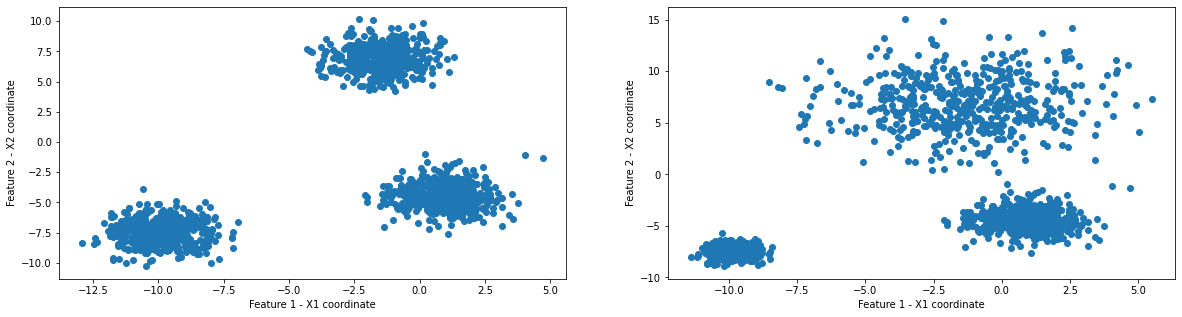

In [2]:
n_samples = 1500 # number of data points
random_state = 100 # seed number for data points generation 
# Generate blobs with similar variances (shapes):
blobs = datasets.make_blobs(n_samples=n_samples,random_state=random_state)
# Generate blobs with different variances (shapes):
varied = datasets.make_blobs(n_samples=n_samples,cluster_std=[1.0, 2.5, 0.5],random_state=random_state)

# Plot the generated datasets:
datsets = {'blobs': blobs,'varied': varied}
plot_nr = 1
plt.figure(figsize=(20, 5))
for key in datsets:
    X, y = datsets[key]
    plt.subplot(1, len(datsets), plot_nr)
    plt.scatter(X[:, 0], X[:, 1])
    plt.xlabel('Feature 1 - X1 coordinate')
    plt.ylabel('Feature 2 - X2 coordinate')
    plot_nr += 1

Duket qartë se duhet të ketë 3 grupime në të dyja rastet, kështu që le të shkojmë me atë numër.

Së pari, le t'i ndajmë pikat çift në grupe. Do të veprojmë si më poshtë:

* Ne marrim koordinatat dy-dimensionale të secilës pikë të të dhënave (X) dhe grupit që i përkasin (y). E RËNDËSISHME: Algoritmi nuk njeh grupimet e pikave të të dhënave, pra mësimin e pambikëqyrur.
* Ne i standardizojmë veçoritë me funksionin StandardScaler, që do të thotë se të gjitha të dhënat tani kanë zero mesatare dhe variancë njësi. Ky është një hap i rëndësishëm në grupimin për të shmangur çdo problem që lind për shkak të formës dhe shpërndarjes së të dhënave.
* Ne thërrasim/inicializojmë algoritmin KMeans dhe caktojmë argumentet e mëposhtme:
   * _n__clusters_ është numri i grupimeve.
   * _init_ është mënyra se si ne inicializojmë centroidet. Ne mund ta bëjmë atë në mënyrë të rastësishme, siç është dhënë në këtë shembull, ose mund të përdorim k-means++ që zgjedh centroidet fillestare të grupimit duke përdorur kampionimin bazuar në një shpërndarje empirike probabiliteti të kontributit të pikave në inercinë e përgjithshme.
   * _n__init_ është numri i herëve që algoritmi do të përpiqet të rigjenerojë rastësisht centroidet fillestare përpara se të zgjedhë rastin më të mirë.
   * _max__iter_ është numri i përsëritjeve përpara se të ndalojë algoritmi.
* Ne e ekzekutojmë algoritmin me kmeans.fit_predict dhe fit_transform (vini re se si e furnizojmë algoritmin vetëm me vlerat X).
* Ne grafikojmë rezultatet, ku çdo grup është në një ngjyrë të ndryshme. 

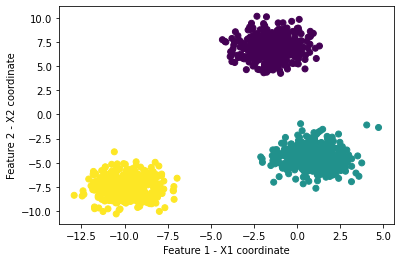

In [3]:
X, y = datsets['blobs'] # retrieve data
scaler = StandardScaler() # standardize data
kmeans = KMeans(n_clusters=3,init='random',n_init=5,max_iter=20) # initialize algorithm
y_pred = kmeans.fit_predict(scaler.fit_transform(X)) # run algorithm
#plot:
plt.scatter(X[:, 0], X[:, 1], c=y_pred) 
plt.xlabel('Feature 1 - X1 coordinate')
plt.ylabel('Feature 2 - X2 coordinate');

Vini re se si të dhënat ndahen në 3 grupe në mënyrë mjaft logjike sipas standardeve tona. Por pyetja që do të trajtojmë më vonë është se si të përcaktojmë numrin e grupimeve në përgjithësi, kur nuk mund ta imagjinojmë problemin.

Më pas, le të kontrollojmë se çfarë ndodh kur përpiqemi të ndajmë të dhënat me formë të ndryshme në 3 grupime. Ne përdorim të njëjtat argumente si më parë, me përjashtim që këtë herë vendosim numrin e inicializimeve të rastësishme në 1. Kjo do të thotë se algoritmi do të përpiqet të ndajë të dhënat pas vetëm 1 tentative të inicializimit të rastësishëm të centroideve. Ekzekutoni kodin e mëposhtëm disa herë dhe vini re se si grupimi nuk është i qëndrueshëm pasi varet nga kushtet fillestare.

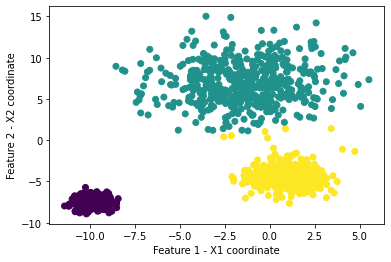

In [4]:
X, y = datsets['varied'] # retrieve data
scaler = StandardScaler() # standardize data
kmeans = KMeans(n_clusters=3,init='random',n_init=1,max_iter=20) # initialize algorithm
y_pred = kmeans.fit_predict(scaler.fit_transform(X)) # run algorithm
# plot:
plt.scatter(X[:, 0], X[:, 1], c=y_pred) 
plt.xlabel('Feature 1 - X1 coordinate')
plt.ylabel('Feature 2 - X2 coordinate');

Kjo mund të rregullohet lehtësisht në disa mënyra të ndryshme:
* numri i inicializimeve mund të jetë më i lartë (si në shembullin e mëparshëm),
* numri i përsëritjeve mund të jetë më i lartë (megjithëse kjo nuk garanton gjithmonë konvergjencë),
* Mund të përdoret teknikë e ndryshme inicializimi: k-means++ në vend të rastësishme.

Provoni përsëri shembullin, por këtë herë duke ndryshuar vlerat e këtyre tre argumenteve dhe duke vëzhguar rezultatet.

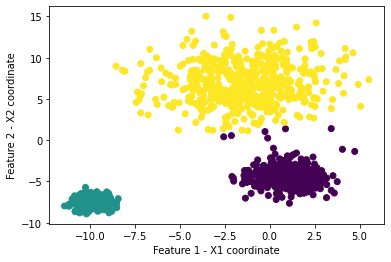

In [5]:
X, y = datsets['varied'] # retrieve data
scaler = StandardScaler() # standardize data

# Try both methods by inserting 0 for 'random' or 1 for 'k-means++' 
# in the 'init' list when calling KMeans: 
init=['random','k-means++'] 
# Try different numbers of initializations:
n_init=1 
# Try different (larger) numbers of maximum iterations:
max_iter=200 

kmeans = KMeans(n_clusters=3,init=init[0],n_init=n_init,max_iter=max_iter) # initialize algorithm
y_pred = kmeans.fit_predict(scaler.fit_transform(X)) # run algorithm
# plot:
plt.scatter(X[:, 0], X[:, 1], c=y_pred) 
plt.xlabel('Feature 1 - X1 coordinate')
plt.ylabel('Feature 2 - X2 coordinate');

Vini re se për një inicializim të vetëm të rastësishëm, ndonjëherë grupet mund të mos konvergojnë siç duhet, pavarësisht nga numri i përsëritjeve.

### 9.1.4. Përcaktimi i numrit të grupimeve

Nëse problemi nuk është thjesht i kuptueshëm dhe i vizualizueshëm, ne nuk mund të përcaktojmë gjithmonë numrin e grupimeve lehtësisht. Një metodë e mirë për të përcaktuar numrin më të mirë të grupimeve është përdorimi i të ashtuquajturës **"metoda e bërrylit"**.

Ideja pas saj është të llogaritet vlera e shtrembërimit në fund të grupimit për numra të ndryshëm grupimesh. Mos harroni se kjo vlerë është një paraqitje e "të keqes" ose gabimit në grupim dhe duhet të jetë sa më e ulët që të jetë e mundur.

Nëse ka një rënie të papritur të shtrembërimit në një numër të caktuar, pas së cilës zvogëlimi është më i ngadalshëm dhe linear, atëherë ky është numri i grupimeve që zgjidhet. Arsyeja është se numri i grupimeve prodhon një shtrembërim shumë të madh për më pak grupime, dhe nuk ia vlen për më shumë grupime pasi shtrembërimi nuk zvogëlohet më shumë.

Le ta tregojmë këtë në shembujt e mëparshëm. 

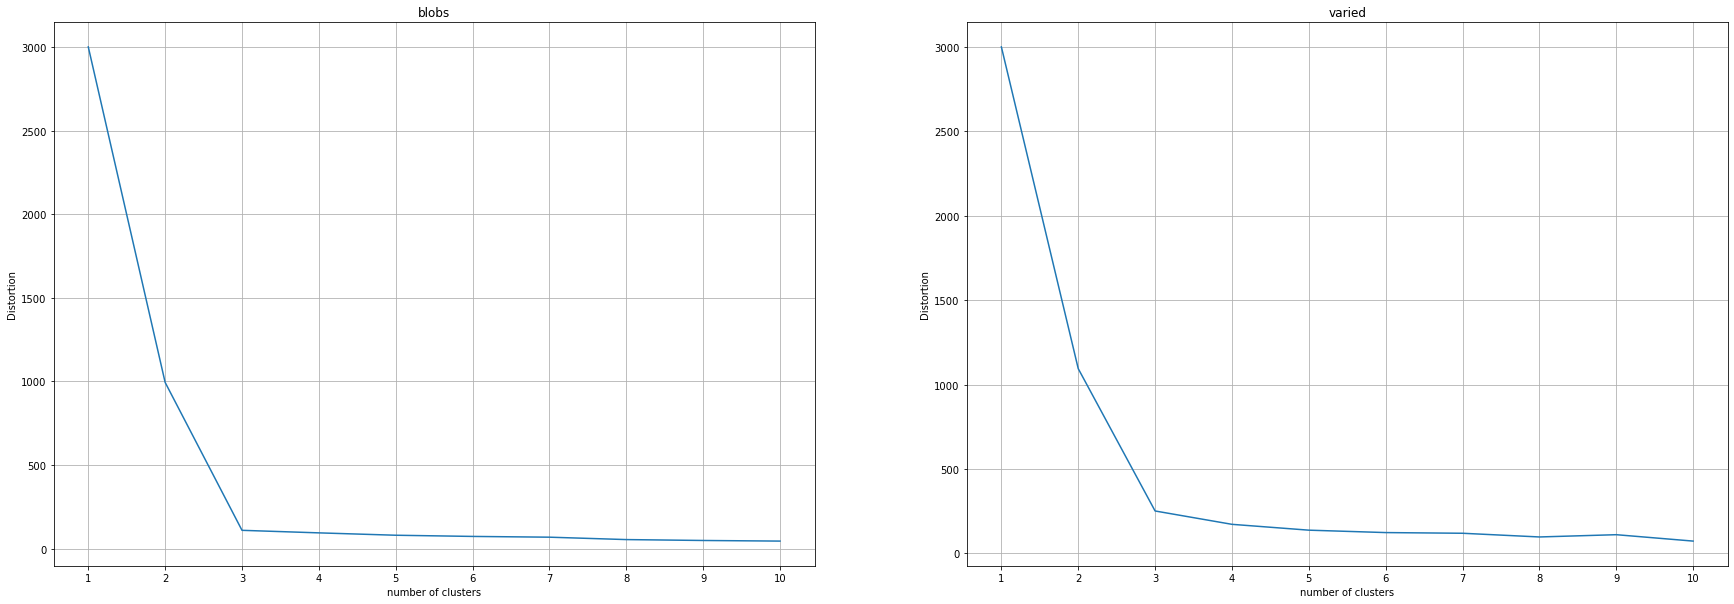

In [6]:
plt.figure(figsize=(30, 10)) # generate an empty figure
plot_nr = 1 # start a counter for the number of plots
max_nr_clusters = 10 # maximum number of clusters

for key in datsets: # for each dataset:
    X, y = datsets[key] # retrieve data
    cost_func = [] # define an empty list to store the values of the distortion
    for nr_clusters in range(1, max_nr_clusters + 1): # for an increasing number of clusters, starting from one:
        scaler = StandardScaler() # standardize data
        kmeans = KMeans(n_clusters=nr_clusters,init='random',n_init=5) # initialize algorithm
        kmeans.fit(scaler.fit_transform(X)) # run algorithm
        cost_func.append(kmeans.inertia_) # calculate inertia (interchangable with distortion)
    # Plot the dependence of the distortion from the number of clusters:
    plt.subplot(1, len(datsets), plot_nr) 
    plt.plot(range(1, 11), cost_func)
    plt.xlabel('number of clusters')
    plt.ylabel('Distortion')
    plt.title(key)
    plt.xticks(range(1, 11))
    plt.grid()
    plot_nr += 1 

Është e qartë se bërryli (pika e thyerjes) në të dyja rastet shfaqet për 3 grupime. Prandaj zgjedhja jonë në fillim, e frymëzuar nga pamja e të dhënave, ishte e saktë.

Sigurisht, kjo metodë shërben vetëm për të dhënë një rekomandim për numrin e grupimeve. Çdo informacion shtesë rreth problemit mund të ndihmojë në përcaktimin e numrit të grupimeve edhe më shumë se metoda e bërrylit.

### 9.1.5. Kufizimet e KMeans

KMeans është i përshtatshëm sepse është i lehtë për t'u zbatuar dhe mund të përdoret me grupe të mëdha të dhënash. Megjithatë, një nga të metat e tij kryesore (përveç faktit se është i ndjeshëm ndaj vendndodhjeve fillestare të grupimit qendror) është se funksionon dobët kur të dhënat kanë forma të parregullta (jo të ngjashme me sferën).

Një shembull i tillë mund të shihet nga grupet e mëposhtme të të dhënave, të formuara si rrathë koncentrikë dhe si gjysmërrathë.

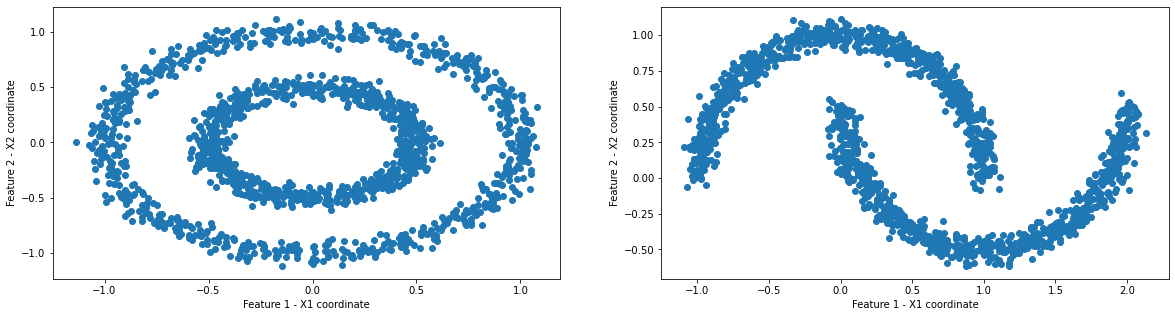

In [7]:
n_samples = 1500 # number of data points
random_state = 100 # seed number for data points generation 
# Generate concentrical circles:
noisy_circles = datasets.make_circles(n_samples=n_samples,factor=.5,noise=.05)
# Generate crescents:
noisy_moons = datasets.make_moons(n_samples=n_samples,noise=.05) 

# Plot the generated datasets:
datsets2 = {'circles': noisy_circles,'crescents': noisy_moons}
plot_nr = 1
plt.figure(figsize=(20, 5))
for key in datsets2:
    X, y = datsets2[key]
    plt.subplot(1, len(datsets2), plot_nr)
    plt.scatter(X[:, 0], X[:, 1])
    plt.xlabel('Feature 1 - X1 coordinate')
    plt.ylabel('Feature 2 - X2 coordinate')
    plot_nr += 1

Le të përpiqemi t'i ndajmë të dhënat në 2 grupime, duke pritur që ato të përmbajnë secilin nga 2 rrathët në shembullin e parë dhe secilën nga 2 gjysmërrathët në shembullin e dytë.

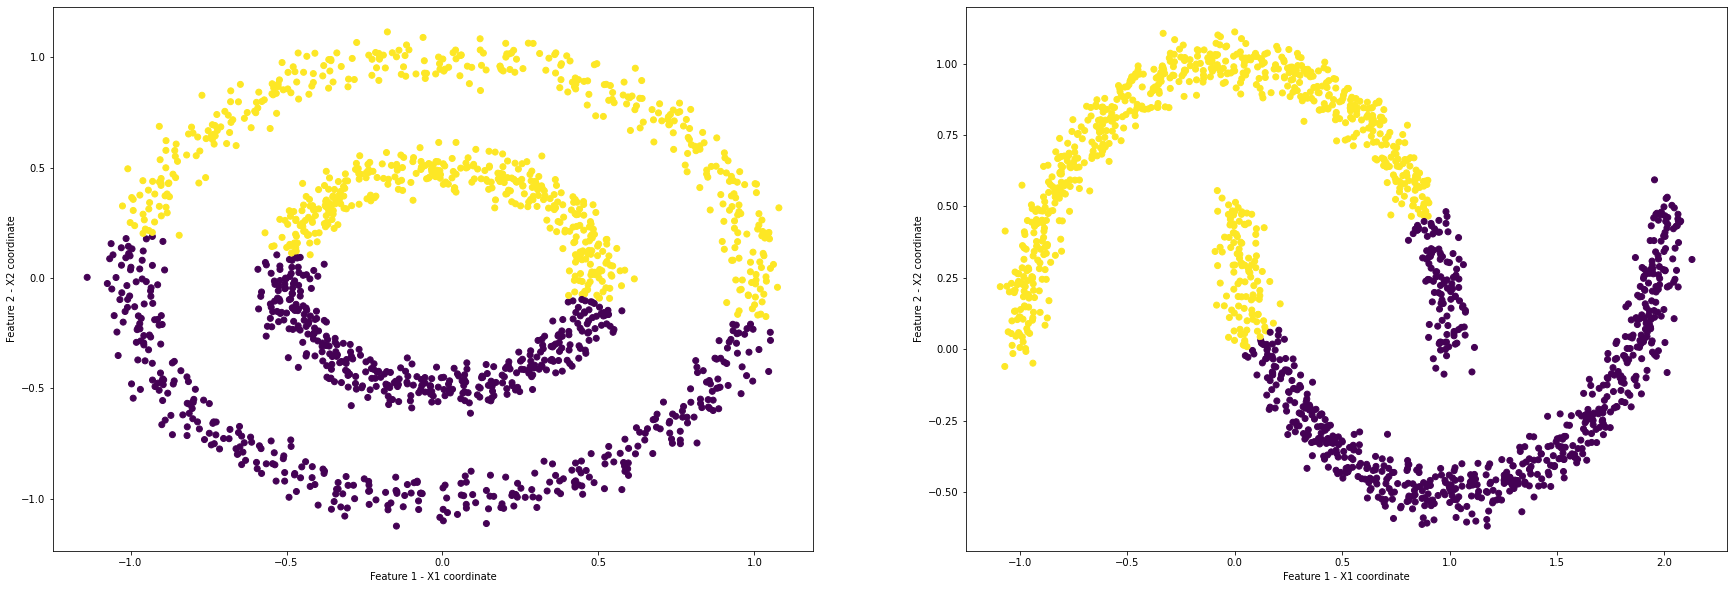

In [8]:
plt.figure(figsize=(30, 10)) # generate an empty figure
plot_nr = 1 # start a counter for the number of plots

for key in datsets2: # for each dataset:
    X, y = datsets2[key] # retrieve data
    scaler = StandardScaler() # standardize data
    kmeans = KMeans(n_clusters=2,init='random',n_init=5,max_iter=200) # initialize algorithm
    y_pred = kmeans.fit_predict(scaler.fit_transform(X)) # run algorithm
    # plot:
    plt.subplot(1, len(datsets2), plot_nr)
    plt.scatter(X[:, 0], X[:, 1], c=y_pred) 
    plt.xlabel('Feature 1 - X1 coordinate')
    plt.ylabel('Feature 2 - X2 coordinate')
    plot_nr += 1

Në raste të tilla, rekomandohen metoda të tjera. Për shembull, **DBSCAN (Density-based spatial clustering of applications with noise - Grumbullimi hapësinor i bazuar në dendësi i aplikacioneve me zhurmë)** përdor densitetin e pikave të të dhënave në vend të distancave të tyre, kështu që do të funksiononte më mirë në këtë shembull.

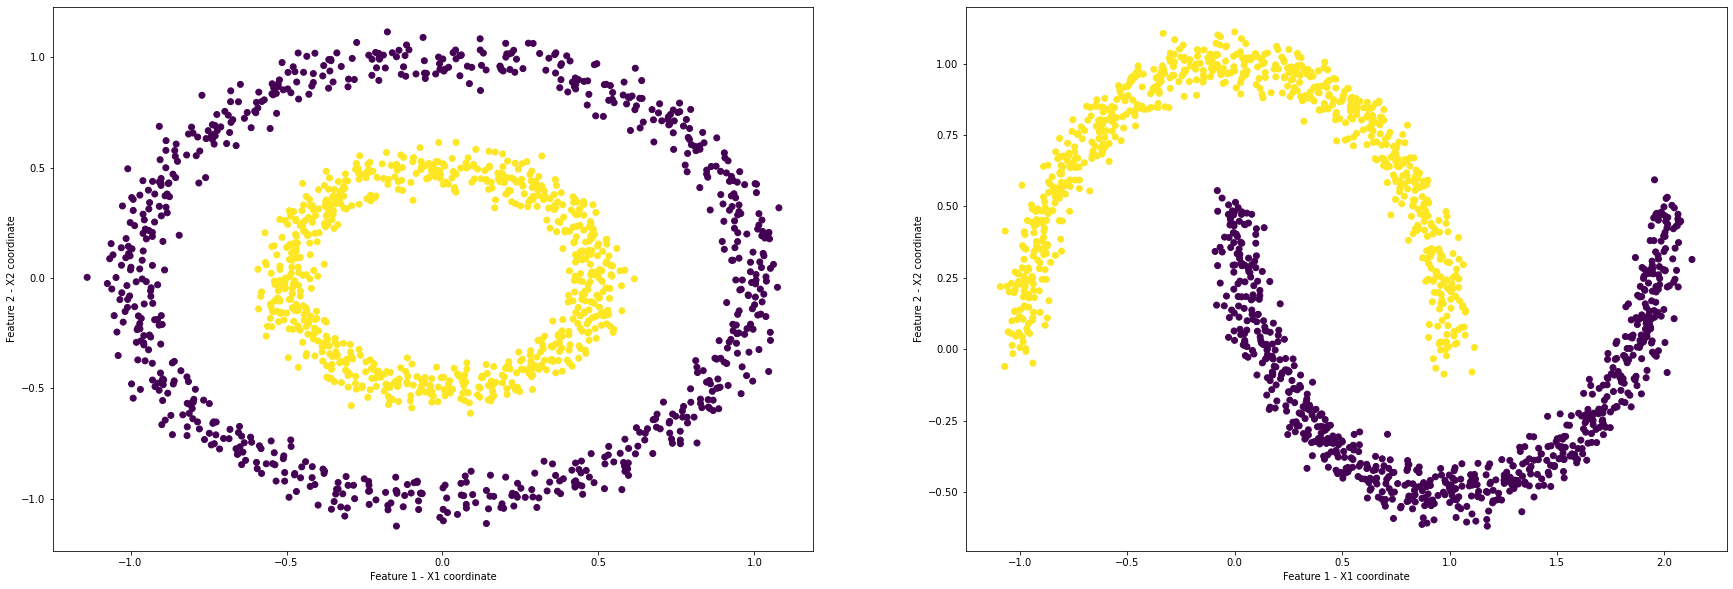

In [9]:
from sklearn.cluster import DBSCAN 

plt.figure(figsize=(30, 10)) # generate an empty figure
plot_nr = 1 # start a counter for the number of plots

for key in datsets2: # for each dataset:
    X, y = datsets2[key] # retrieve data
    scaler = StandardScaler() # standardize data
    dbscan = DBSCAN(eps=0.3,min_samples=10) # initialize algorithm
    y_pred = dbscan.fit_predict(scaler.fit_transform(X)) # run algorithm
    # plot:
    plt.subplot(1, len(datsets2), plot_nr)
    plt.scatter(X[:, 0], X[:, 1], c=y_pred) 
    plt.xlabel('Feature 1 - X1 coordinate')
    plt.ylabel('Feature 2 - X2 coordinate')
    plot_nr += 1

DBSCAN i njohu me sukses të dy format, sepse i intereson dendësia si paraqitje e grupimit të të dhënave, në vend të distancës së tyre (e cila është e dukshme nëse krahasoni me rezultatet nga KMeans në të njëjtat grupe të dhënash). Nga ana tjetër, DBSCAN nuk do të funksionojë mirë nëse format kanë densitet të ndryshëm.

Dy hiperparametrat që përcaktuam për DBSCAN janë:
* _eps_ është distanca maksimale ndërmjet dy mostrave që njëra të konsiderohet si në fqinjësi të tjetrës.
* _min__samples_ është numri i mostrave në një lagje për një pikë që konsiderohet si pikë thelbësore.

Këta hiperparametra janë shumë më të vështirë për t'u akorduar sesa ato në KMeans sepse janë më abstraktë, kështu që megjithëse është më i fuqishëm se KMeans, ky është një algoritëm më delikat dhe më i vështirë për t'u marrë si duhet.

## 9.2. Shembull i përdorimit të KMeans për grupimin e stacioneve të motit sipas karakteristikave klimatike

Ky shembull do të përdorë një grup të dhënash nga stacionet meteorologjike (moti) në Kanada, veçoritë e të cilave janë matjet në secilin stacion. Ne do të bëjmë grupimin sipas llojeve të klimës dhe më pas do t'i vizualizojmë stacionet gjeografikisht për të vlerësuar qasjen tonë.

Do t'ju duhen bibliotekat e mëposhtme:
1. wget -> (conda install -c conda-forge python-wget) për shkarkimin e skedarëve
2. cartopy -> (conda install -c conda-forge cartopy) për vizatimin e një harte
3. PIL -> (conda install -c anaconda pillow)

Informacioni i grupit të të dhënave:
<h4 align = "center">
Environment Canada    
Monthly Values for July - 2015	
</h4>
<html>
<head>
<style>
table {
    font-family: arial, sans-serif;
    border-collapse: collapse;
    width: 100%;
}

td, th {
    border: 1px solid #dddddd;
    text-align: left;
    padding: 8px;
}

tr:nth-child(even) {
    background-color: #dddddd;
}
</style>
</head>
<body>

<table>
  <tr>
    <th>Name in the table</th>
    <th>Meaning</th>
  </tr>
  <tr>
    <td><font color = "green"><strong>Stn_Name</font></td>
    <td><font color = "green"><strong>Station Name</font</td>
  </tr>
  <tr>
    <td><font color = "green"><strong>Lat</font></td>
    <td><font color = "green"><strong>Latitude (North+, degrees)</font></td>
  </tr>
  <tr>
    <td><font color = "green"><strong>Long</font></td>
    <td><font color = "green"><strong>Longitude (West - , degrees)</font></td>
  </tr>
  <tr>
    <td>Prov</td>
    <td>Province</td>
  </tr>
  <tr>
    <td>Tm</td>
    <td>Mean Temperature (°C)</td>
  </tr>
  <tr>
    <td>DwTm</td>
    <td>Days without Valid Mean Temperature</td>
  </tr>
  <tr>
    <td>D</td>
    <td>Mean Temperature difference from Normal (1981-2010) (°C)</td>
  </tr>
  <tr>
    <td><font color = "black">Tx</font></td>
    <td><font color = "black">Highest Monthly Maximum Temperature (°C)</font></td>
  </tr>
  <tr>
    <td>DwTx</td>
    <td>Days without Valid Maximum Temperature</td>
  </tr>
  <tr>
    <td><font color = "black">Tn</font></td>
    <td><font color = "black">Lowest Monthly Minimum Temperature (°C)</font></td>
  </tr>
  <tr>
    <td>DwTn</td>
    <td>Days without Valid Minimum Temperature</td>
  </tr>
  <tr>
    <td>S</td>
    <td>Snowfall (cm)</td>
  </tr>
  <tr>
    <td>DwS</td>
    <td>Days without Valid Snowfall</td>
  </tr>
  <tr>
    <td>S%N</td>
    <td>Percent of Normal (1981-2010) Snowfall</td>
  </tr>
  <tr>
    <td><font color = "green"><strong>P</font></td>
    <td><font color = "green"><strong>Total Precipitation (mm)</font></td>
  </tr>
  <tr>
    <td>DwP</td>
    <td>Days without Valid Precipitation</td>
  </tr>
  <tr>
    <td>P%N</td>
    <td>Percent of Normal (1981-2010) Precipitation</td>
  </tr>
  <tr>
    <td>S_G</td>
    <td>Snow on the ground at the end of the month (cm)</td>
  </tr>
  <tr>
    <td>Pd</td>
    <td>Number of days with Precipitation 1.0 mm or more</td>
  </tr>
  <tr>
    <td>BS</td>
    <td>Bright Sunshine (hours)</td>
  </tr>
  <tr>
    <td>DwBS</td>
    <td>Days without Valid Bright Sunshine</td>
  </tr>
  <tr>
    <td>BS%</td>
    <td>Percent of Normal (1981-2010) Bright Sunshine</td>
  </tr>
  <tr>
    <td>HDD</td>
    <td>Degree Days below 18 °C</td>
  </tr>
  <tr>
    <td>CDD</td>
    <td>Degree Days above 18 °C</td>
  </tr>
  <tr>
    <td>Stn_No</td>
    <td>Climate station identifier (first 3 digits indicate   drainage basin, last 4 characters are for sorting alphabetically).</td>
  </tr>
  <tr>
    <td>NA</td>
    <td>Not Available</td>
  </tr>


</table>

</body>
</html>
    
    
Importoni bibliotekat e nevojshme, shkarkoni skedarin e të dhënave: 

In [11]:
import wget
import cartopy.crs as ccrs
import cartopy

Nëse bibliotekat **wget** dhe **cartopy** nuk mund të importohen, së pari hiqni komentin dhe ekzekutoni qelizën e mëposhtme dhe më pas provoni t'i importoni përsëri

In [23]:
#!pip install wget
#!pip install cartopy

Pastaj importoni pjesën tjetër të bibliotekave:

In [ ]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd

In [13]:
wget.download('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/weather-stations20140101-20141231.csv')

100% [............................................................................] 129821 / 129821

'weather-stations20140101-20141231 (3).csv'

In [14]:
data = pd.read_csv('weather-stations20140101-20141231.csv')

In [15]:
data.head()

,Stn_Name,Lat,Long,Prov,Tm,DwTm,D,Tx,DwTx,Tn,...,DwP,P%N,S_G,Pd,BS,DwBS,BS%,HDD,CDD,Stn_No
0,CHEMAINUS,48.935,-123.742,BC,8.2,0.0,NaN,13.5,0.0,1.0,...,0.0,NaN,0.0,12.0,NaN,NaN,NaN,273.3,0.0,1011500
1,COWICHAN LAKE FORESTRY,48.824,-124.133,BC,7.0,0.0,3.0,15.0,0.0,-3.0,...,0.0,104.0,0.0,12.0,NaN,NaN,NaN,307.0,0.0,1012040
2,LAKE COWICHAN,48.829,-124.052,BC,6.8,13.0,2.8,16.0,9.0,-2.5,...,9.0,NaN,NaN,11.0,NaN,NaN,NaN,168.1,0.0,1012055
3,DISCOVERY ISLAND,48.425,-123.226,BC,NaN,NaN,NaN,12.5,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1012475
4,DUNCAN KELVIN CREEK,48.735,-123.728,BC,7.7,2.0,3.4,14.5,2.0,-1.0,...,2.0,NaN,NaN,11.0,NaN,NaN,NaN,267.7,0.0,1012573


Heqja e të dhënave boshe (NaN):

In [16]:
data.drop(columns=['BS', 'DwBS', 'BS%', 'D', 'S', 'DwS', 'S%N', 'P%N', 'S_G'], inplace=True)
data.dropna(axis='rows', inplace=True)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1143 entries, 0 to 1340
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Stn_Name  1143 non-null   object 
 1   Lat       1143 non-null   float64
 2   Long      1143 non-null   float64
 3   Prov      1143 non-null   object 
 4   Tm        1143 non-null   float64
 5   DwTm      1143 non-null   float64
 6   Tx        1143 non-null   float64
 7   DwTx      1143 non-null   float64
 8   Tn        1143 non-null   float64
 9   DwTn      1143 non-null   float64
 10  P         1143 non-null   float64
 11  DwP       1143 non-null   float64
 12  Pd        1143 non-null   float64
 13  HDD       1143 non-null   float64
 14  CDD       1143 non-null   float64
 15  Stn_No    1143 non-null   object 
dtypes: float64(13), object(3)
memory usage: 151.8+ KB


In [18]:
data.describe()

,Lat,Long,Tm,DwTm,Tx,DwTx,Tn,DwTn,P,DwP,Pd,HDD,CDD
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.0
mean,50.950539,-97.471895,-11.535696,2.270341,3.082677,1.846019,-25.880490,1.834646,50.091426,2.524934,7.446194,757.104549,0.0
std,5.757043,23.136281,10.328233,4.964097,8.684320,4.208333,12.654909,4.314045,62.909236,4.666180,4.762158,309.067992,0.0
min,42.043000,-140.868000,-36.400000,0.000000,-28.900000,0.000000,-49.700000,0.000000,0.000000,0.000000,0.000000,26.000000,0.0
25%,46.942000,-117.165000,-17.800000,0.000000,-3.400000,0.000000,-35.000000,0.000000,13.000000,0.000000,4.000000,528.250000,0.0
50%,49.872000,-104.008000,-13.400000,0.000000,3.300000,0.000000,-29.000000,0.000000,26.400000,0.000000,7.000000,797.200000,0.0
75%,53.162500,-74.311000,-4.800000,2.000000,10.350000,1.000000,-21.000000,1.000000,59.650000,3.000000,11.000000,966.400000,0.0
max,82.500000,-52.753000,9.500000,27.000000,22.000000,27.000000,5.300000,27.000000,516.800000,27.000000,28.000000,1523.400000,0.0


In [19]:
coords = data[['Long', 'Lat']]

Heqja e të gjitha kolonave që nuk janë relevante për klimën:

In [20]:
data.drop(columns=['Long', 'Lat', 'Stn_No', 'Stn_Name', 'Prov'], inplace=True)
data.head()

,Tm,DwTm,Tx,DwTx,Tn,DwTn,P,DwP,Pd,HDD,CDD
0,8.2,0.0,13.5,0.0,1.0,0.0,178.8,0.0,12.0,273.3,0.0
1,7.0,0.0,15.0,0.0,-3.0,0.0,258.6,0.0,12.0,307.0,0.0
2,6.8,13.0,16.0,9.0,-2.5,9.0,264.6,9.0,11.0,168.1,0.0
4,7.7,2.0,14.5,2.0,-1.0,2.0,168.4,2.0,11.0,267.7,0.0
5,8.8,0.0,13.1,0.0,1.9,0.0,81.0,8.0,12.0,258.6,0.0


Shpërndarja gjeografike e stacioneve të motit:

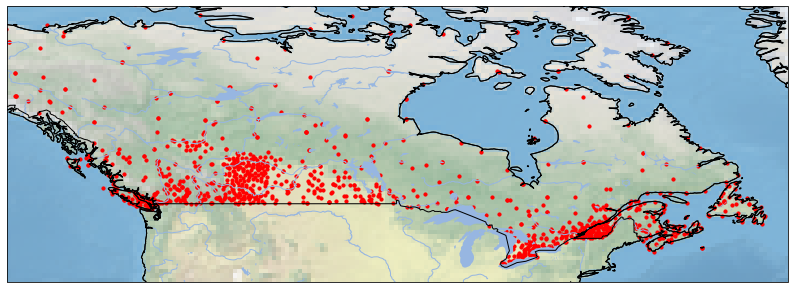

In [22]:
extent = [-140, -50, 40, 65]

plt.figure(figsize=(14, 10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.stock_img()
ax.set_extent(extent)
ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.COASTLINE)
ax.add_feature(cartopy.feature.LAKES)
ax.add_feature(cartopy.feature.RIVERS)
ax.add_feature(cartopy.feature.BORDERS)
ax.scatter(coords['Long'], coords['Lat'], transform=ccrs.PlateCarree(), color='r', s=10)
plt.show()

Grupimi KMeans: 

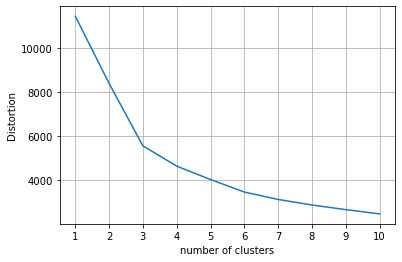

In [21]:
max_nr_clusters = 10
cost_func = []
for nr_clusters in range(1, max_nr_clusters + 1):
    scaler = StandardScaler()
    kmeans = KMeans(n_clusters=nr_clusters, init='k-means++', n_init=20)
    kmeans.fit(scaler.fit_transform(data))
    cost_func.append(kmeans.inertia_)

plt.plot(range(1, max_nr_clusters + 1), cost_func)
plt.xlabel('number of clusters')
plt.ylabel('Distortion')
plt.xticks(range(1,  max_nr_clusters + 1))
plt.grid()

Sipas metodës së bërrylit, ne mund të zgjedhim 3 ose 6 grupime. Le të shkojmë me 3.

In [22]:
scaler = StandardScaler()
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=20)
y_pred = kmeans.fit_predict(scaler.fit_transform(data))

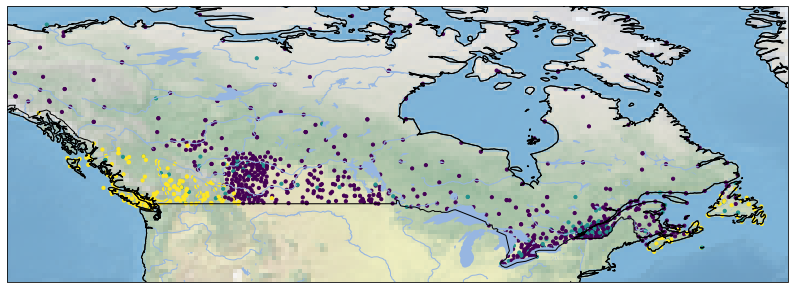

In [23]:
extent = [-140, -50, 40, 65]

plt.figure(figsize=(14, 10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.stock_img()
ax.set_extent(extent)
ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.COASTLINE)
ax.add_feature(cartopy.feature.LAKES)
ax.add_feature(cartopy.feature.RIVERS)
ax.add_feature(cartopy.feature.BORDERS)
ax.scatter(coords['Long'], coords['Lat'], transform=ccrs.PlateCarree(), c=y_pred, s=10)
plt.show()

Për 3 grupime, nëse shpërfillim stacionet në veri të Kanadasë, mund të shohim se grumbullimi sipas karakteristikave të motit në të vërtetë gjeneron grupime të cilat shpërndahen sipas afërsisë së stacionit me një oqean.

Kjo ka një kuptim, por ndoshta të provosh grupimin me një DBSCAN të akorduar me kujdes mund të japë rezultate më të mira.

Provoni gjithashtu një numër të ndryshëm grupesh.

## 9.3. Aplikimet e Grupimit

Grumbullimi i KMeans është mjaft i lehtë për t'u zbatuar edhe në grupe të mëdha të dhënash, kështu që ka shumë aplikacione. Është përdorur me sukses në grupimin e përdoruesve në segmentimin e tregut, klasifikimin e objekteve astronomike dhe përpunimin e imazhit në vizionin kompjuterik, midis shumë fushave të tjera. Gjithashtu përdoret shpesh si një hap parapërpunimi për algoritme të tjera.

Këtu do të demonstrojmë përdorimin e grupimit KMeans për kuantizimin e ngjyrave. Ky është procesi i reduktimit të paletës së ngjyrave të një imazhi në një numër fiks ngjyrash _k_. Ne e bëjmë këtë duke marrë çdo piksel të figurës si një pikë të dhënash dhe vlerat e saj RGB si veçori. Pastaj i ndajmë pikselët në grupe _k_ duke përdorur KMeans, dhe secilit piksel i caktojmë një ngjyrë të re - ngjyrën e qendrës së grupit të tij.

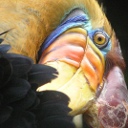

Original pixel RGB values:
 [[[219 180 103]
  [230 185 116]
  [226 186 110]
  ...
  [ 14  15  13]
  [ 13  15  12]
  [ 12  14  12]]

 [[230 193 119]
  [224 192 120]
  [226 192 124]
  ...
  [ 16  16  13]
  [ 14  15  10]
  [ 11  14   9]]

 [[228 191 123]
  [228 191 121]
  [220 185 118]
  ...
  [ 14  16  13]
  [ 13  13  11]
  [ 11  15  10]]

 ...

 [[ 15  18  16]
  [ 18  21  18]
  [ 18  19  16]
  ...
  [ 81  45  45]
  [ 70  43  35]
  [ 72  51  43]]

 [[ 16  17  17]
  [ 17  18  19]
  [ 20  19  20]
  ...
  [ 80  38  40]
  [ 68  39  40]
  [ 59  43  42]]

 [[ 15  19  19]
  [ 20  20  18]
  [ 18  19  17]
  ...
  [ 65  43  39]
  [ 58  37  38]
  [ 52  39  34]]]
Number of pixels (rows): 16384
Number of colors (columns)  3
Data:
 [[0.85882353 0.70588235 0.40392157]
 [0.90196078 0.7254902  0.45490196]
 [0.88627451 0.72941176 0.43137255]
 ...
 [0.25490196 0.16862745 0.15294118]
 [0.22745098 0.14509804 0.14901961]
 [0.20392157 0.15294118 0.13333333]]


In [24]:
# Import libraries:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.io import loadmat
from IPython.display import Image, display

display(Image(filename='bird_small.png')) # show picture
image_data = loadmat('bird_small.mat') # load RGB values of the pixels of the picture
A = image_data['A']
print ("Original pixel RGB values:\n",A)

A = A / 255. # normalize value ranges
X = np.reshape(A, (A.shape[0] * A.shape[1], A.shape[2])) # reshape the array

print ("Number of pixels (rows):",np.size(X,axis=0))
print ("Number of colors (columns) ",np.size(X,axis=1))
print ("Data:\n",X)

Tani kemi të dhënat në grupin X që përfaqësojnë të gjitha vlerat e pikselit me një numër midis 0 dhe 1. Vini re se ka 16384 piksele (rezolucion), dhe çdo piksel ka 3 ngjyra (të kuqe, jeshile dhe ngjyrë blu).

Më pas, ne përdorim KMeans për të ndarë pikselët në grupe sipas ngjashmërisë së ngjyrave të tyre. Pas kësaj, ngjyra e secilit piksel zëvendësohet me ngjyrën e qendrës së saj të grupimit.

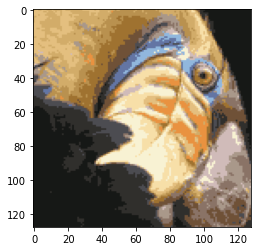

In [25]:
n_clusters = 16 # define number of clusters

# Run the algorithm:
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', n_init=5) 
y_pred = kmeans.fit_predict(X)

# Recolor each pixel with its cluster centroid color and regenerate and show the new image: 
X_recovered = kmeans.cluster_centers_[y_pred] 
X_recovered = np.reshape(X_recovered, (A.shape[0], A.shape[1], A.shape[2]))
plt.imshow(X_recovered);

Fotografia tani ka aq ngjyra sa ka grupe. Imazhi është ende i dallueshëm, por përmban shumë më pak ngjyra se origjinali dhe për këtë arsye madhësia dhe kërkesat e tij për memorie janë zvogëluar.

Provoni të grumbulloni dhe rigjeneroni figurën me numra të ndryshëm grupimesh.

In [26]:
import session_info
session_info.show()